In [9]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

Встановлюємо гіперпараметри:

In [10]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [11]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [12]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [13]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання LSTM шару з 32 вузлами
model.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [14]:
model.build(input_shape=(None, maxlen))

In [15]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [17]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.5525 - loss: 0.6777 - val_acc: 0.7253 - val_loss: 0.5440
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - acc: 0.8065 - loss: 0.4461 - val_acc: 0.8584 - val_loss: 0.3502
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.8590 - loss: 0.3456 - val_acc: 0.8023 - val_loss: 0.5309
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.8657 - loss: 0.3276 - val_acc: 0.8553 - val_loss: 0.3419
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - acc: 0.8821 - loss: 0.3005 - val_acc: 0.8523 - val_loss: 0.3422


Відображення результатів:

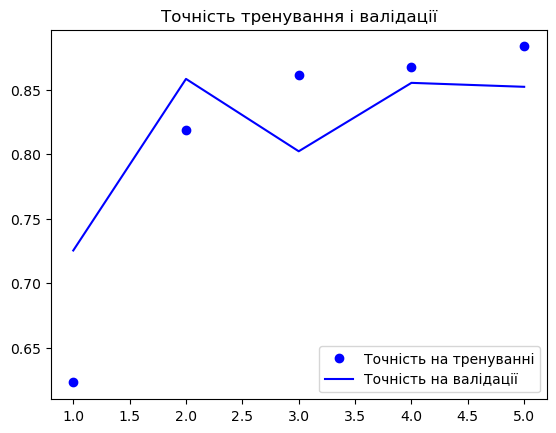

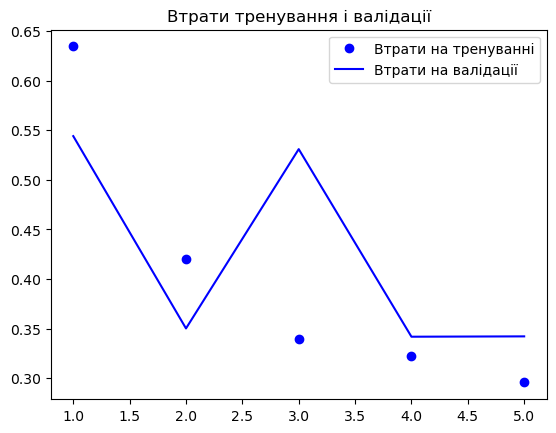

In [19]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [20]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8492 - loss: 0.3514
Test Loss: 0.34581562876701355
Test Accuracy: 0.8511199951171875


Практика з BRNN за допомогою Keras:

In [21]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

Встановлюємо гіперпараметри:

In [22]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [23]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [24]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [25]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [28]:
model.build(input_shape=(None, maxlen))

In [29]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,705 (1.28 MB)

 Trainable params: 336,705 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [31]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - acc: 0.5489 - loss: 0.6834 - val_acc: 0.7723 - val_loss: 0.5101
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - acc: 0.7868 - loss: 0.4751 - val_acc: 0.8205 - val_loss: 0.4057
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - acc: 0.8462 - loss: 0.3662 - val_acc: 0.8487 - val_loss: 0.3773
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - acc: 0.8724 - loss: 0.3178 - val_acc: 0.8556 - val_loss: 0.3350
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - acc: 0.8862 - loss: 0.2981 - val_acc: 0.8813 - val_loss: 0.2970


Відображення результатів:

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [ ]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

Практика з Deep BRNN за допомогою Keras:

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

Встановлюємо гіперпараметри:

In [ ]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [ ]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [ ]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Навчання моделі:

In [ ]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Відображення результатів:

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [ ]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))